In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import warnings
warnings.filterwarnings('ignore')

In [2]:
all_df = pd.read_csv("/Users/juyeonm1/Desktop/CAPSTONE/data/all_cities_month_temp_df.csv")
all_df

,year,month,Monthly Anamoly,Monthly Unc.,city_num
0,1819,7,23.127,1.964,0
1,1819,8,NaN,NaN,0
2,1819,9,20.360,1.764,0
3,1819,10,12.881,2.030,0
4,1819,11,4.459,2.194,0
...,...,...,...,...,...
12059,2020,8,28.999,0.220,4
12060,2020,9,28.836,0.278,4
12061,2020,10,26.535,0.207,4
12062,2020,11,27.341,0.290,4


,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
0,1819,7,23.127,1.964,0,1819-07-01
1,1819,8,NaN,NaN,0,1819-08-01
2,1819,9,20.360,1.764,0,1819-09-01
3,1819,10,12.881,2.030,0,1819-10-01
4,1819,11,4.459,2.194,0,1819-11-01


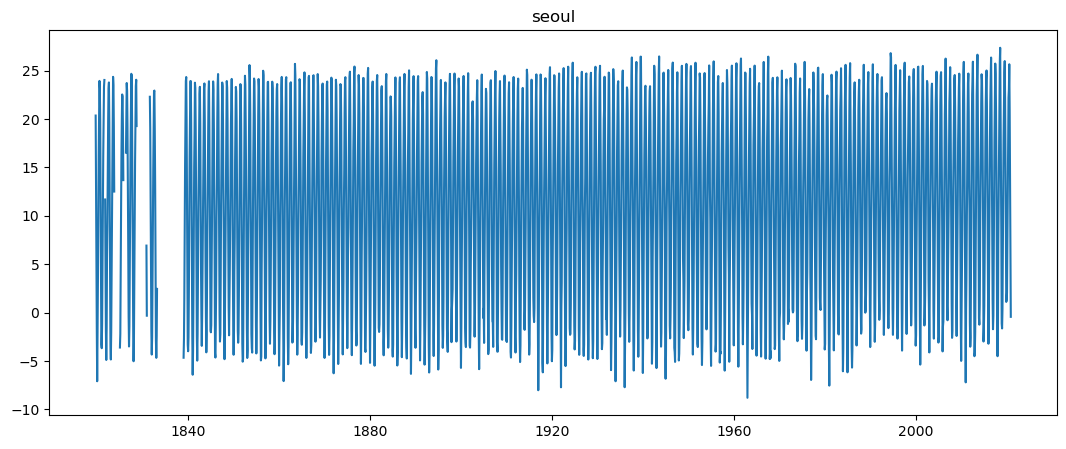

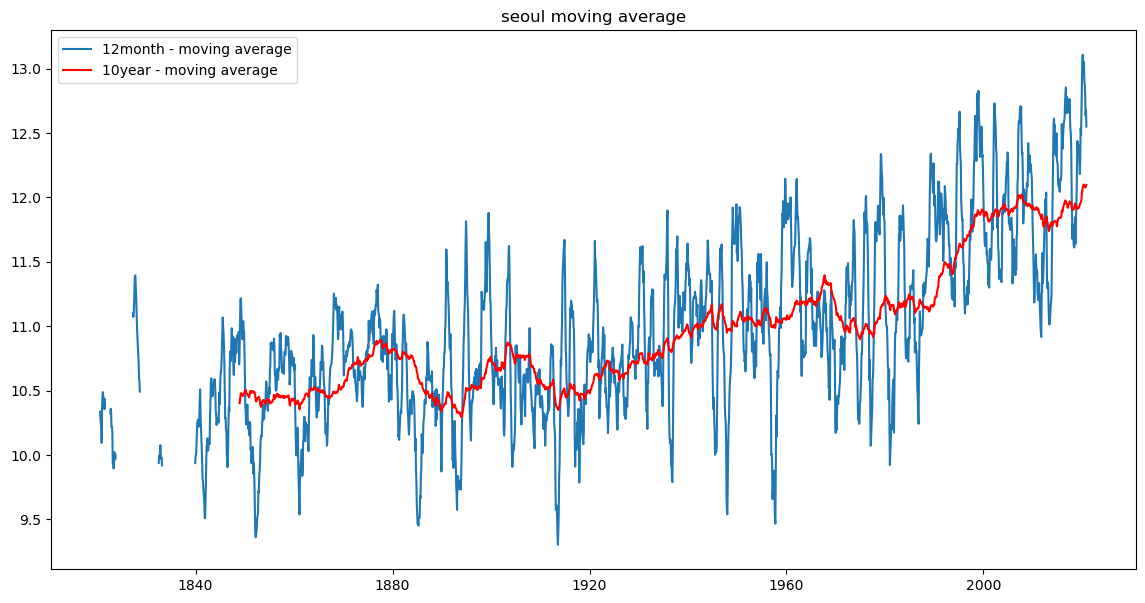

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
2418,1819,7,27.191,1.919,1,1819-07-01
2419,1819,8,NaN,NaN,1,1819-08-01
2420,1819,9,23.599,1.779,1,1819-09-01
2421,1819,10,17.048,1.961,1,1819-10-01
2422,1819,11,10.205,2.007,1,1819-11-01


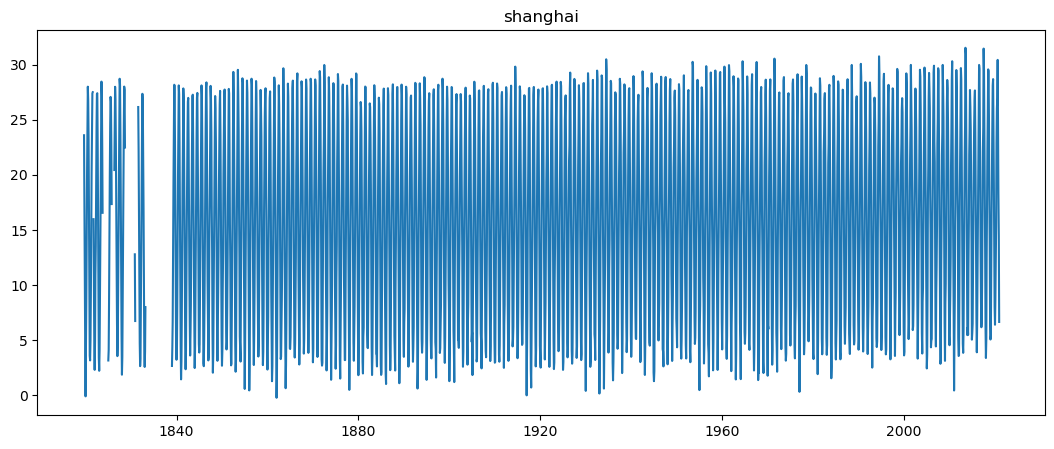

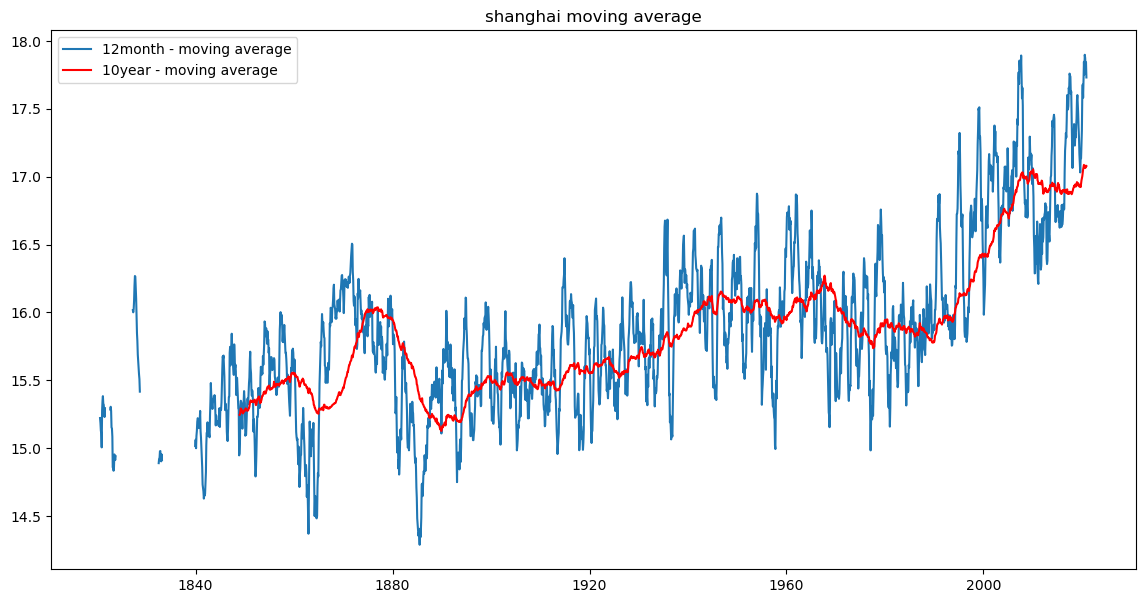

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
4836,1819,7,22.664,2.002,2,1819-07-01
4837,1819,8,NaN,NaN,2,1819-08-01
4838,1819,9,20.356,1.856,2,1819-09-01
4839,1819,10,13.372,1.919,2,1819-10-01
4840,1819,11,6.752,1.990,2,1819-11-01


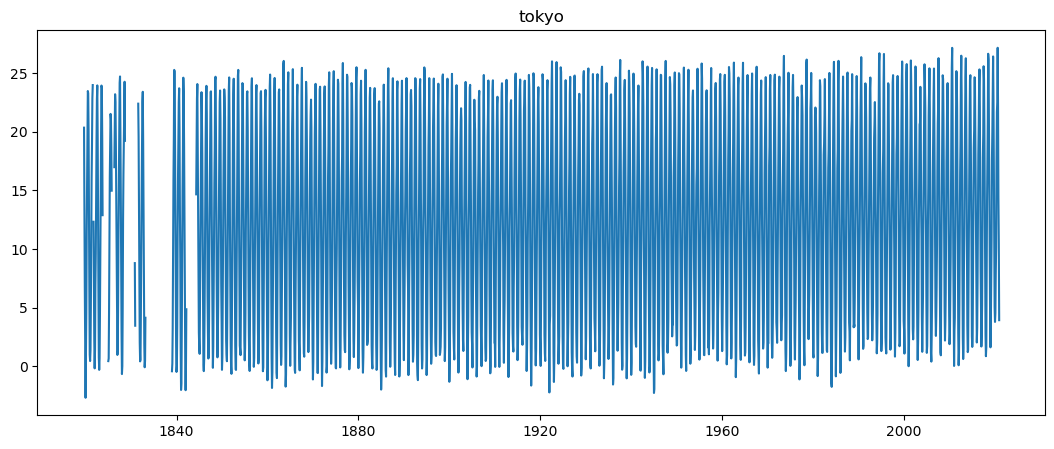

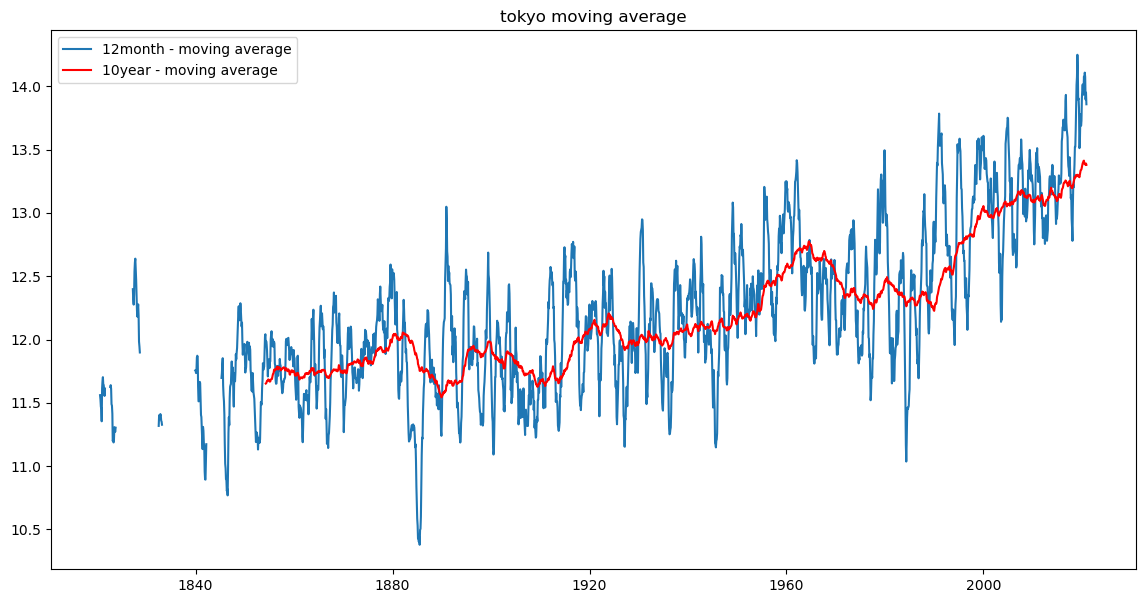

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
7254,1825,1,25.756,1.743,3,1825-01-01
7255,1825,2,25.759,1.327,3,1825-02-01
7256,1825,3,26.399,1.546,3,1825-03-01
7257,1825,4,27.485,1.715,3,1825-04-01
7258,1825,5,27.276,1.133,3,1825-05-01


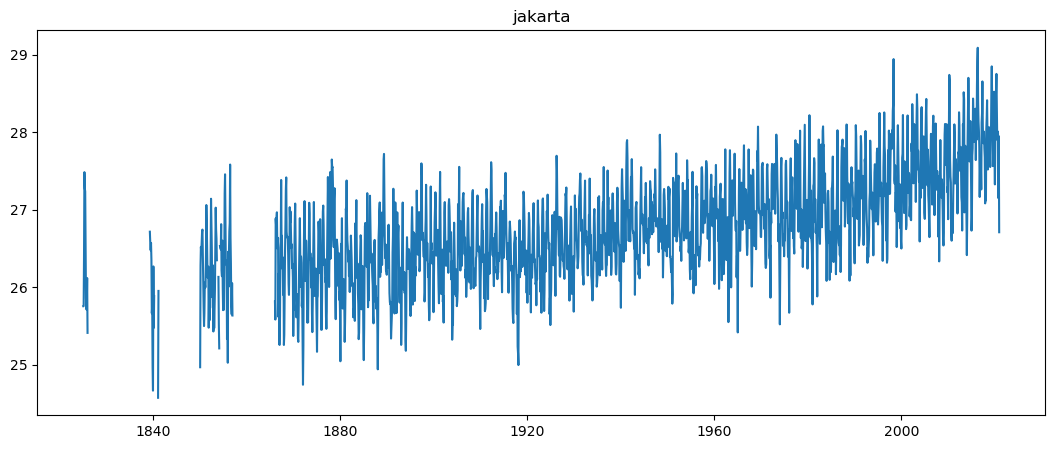

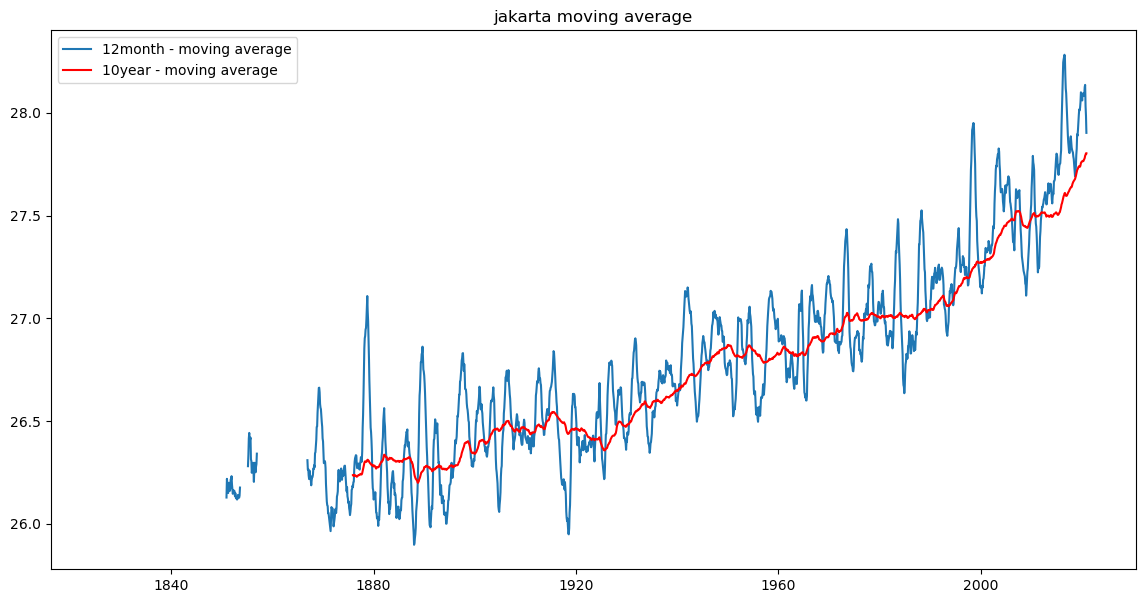

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
9606,1816,3,27.801,2.031,4,1816-03-01
9607,1816,4,28.695,1.816,4,1816-04-01
9608,1816,5,28.817,1.499,4,1816-05-01
9609,1816,6,27.128,1.439,4,1816-06-01
9610,1816,7,25.877,1.725,4,1816-07-01


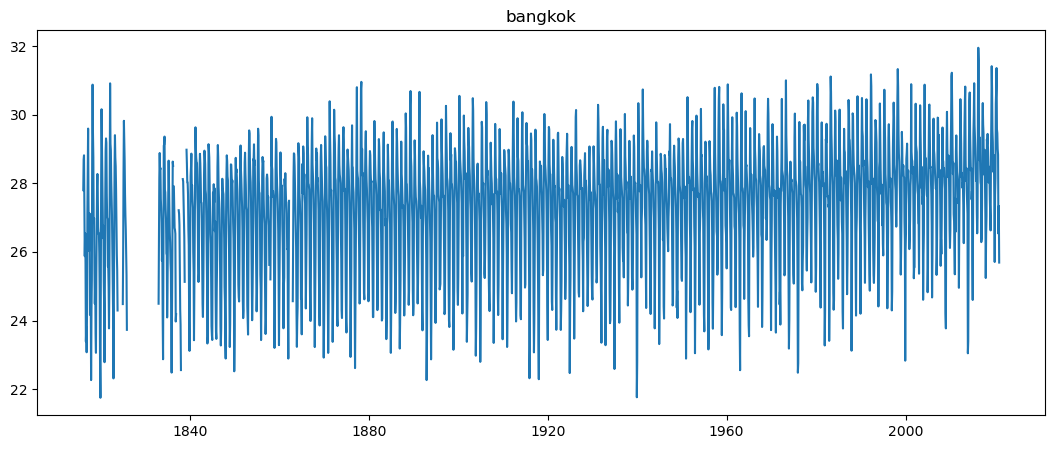

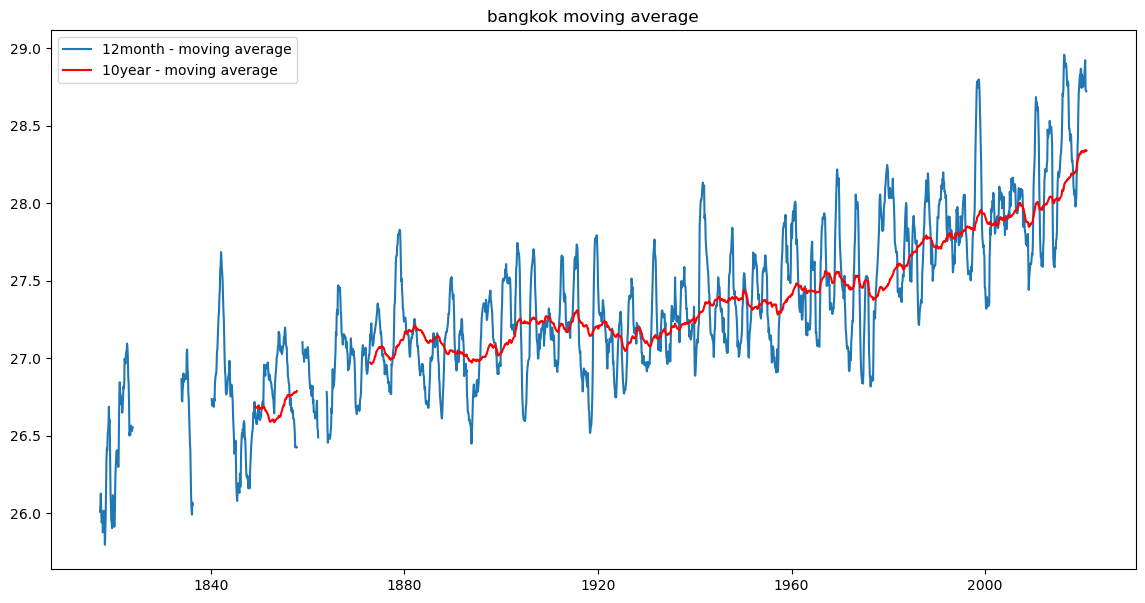

In [3]:
city_names = ['seoul', 'shanghai', 'tokyo', 'jakarta', 'bangkok']

for city in city_names:
    month_df = all_df.loc[all_df.loc[:,"city_num"] == city_names.index(city)]
    month_df["DateTime"] = month_df["year"].astype('str') + '-' + month_df["month"].astype('str')
    month_df["DateTime"] = pd.to_datetime(month_df["DateTime"])
    display(month_df.head(5))

    plt.rcParams['figure.figsize'] = [13, 5]
    plt.plot(month_df['DateTime'],month_df["Monthly Anamoly"])
    plt.title(city)
    plt.show()

    month12_ma = month_df["Monthly Anamoly"].rolling(window=12).mean()
    year10_ma = month_df["Monthly Anamoly"].rolling(window=120).mean()

    plt.rcParams['figure.figsize'] = [14, 7]
    plt.plot(month_df['DateTime'],month12_ma, label="12month - moving average")
    plt.plot(month_df['DateTime'],year10_ma, color='red', label="10year - moving average")
    plt.title(city+" moving average")
    plt.legend()
    plt.show()

# ----------------------------------------------------------------------------------------------------

# SEOUL

In [4]:
seoul_month = all_df.loc[all_df.loc[:,"city_num"] == 0]
seoul_month["DateTime"] = seoul_month["year"].astype('str') + '-' + seoul_month["month"].astype('str')
seoul_month["DateTime"] = pd.to_datetime(seoul_month["DateTime"])
seoul_month

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
0,1819,7,23.127,1.964,0,1819-07-01
1,1819,8,NaN,NaN,0,1819-08-01
2,1819,9,20.360,1.764,0,1819-09-01
3,1819,10,12.881,2.030,0,1819-10-01
4,1819,11,4.459,2.194,0,1819-11-01
...,...,...,...,...,...,...
2413,2020,8,25.660,0.312,0,2020-08-01
2414,2020,9,20.951,0.347,0,2020-09-01
2415,2020,10,13.876,0.280,0,2020-10-01
2416,2020,11,7.990,0.518,0,2020-11-01


### 실제 1819 7월 ~ 2020 12월 시각화

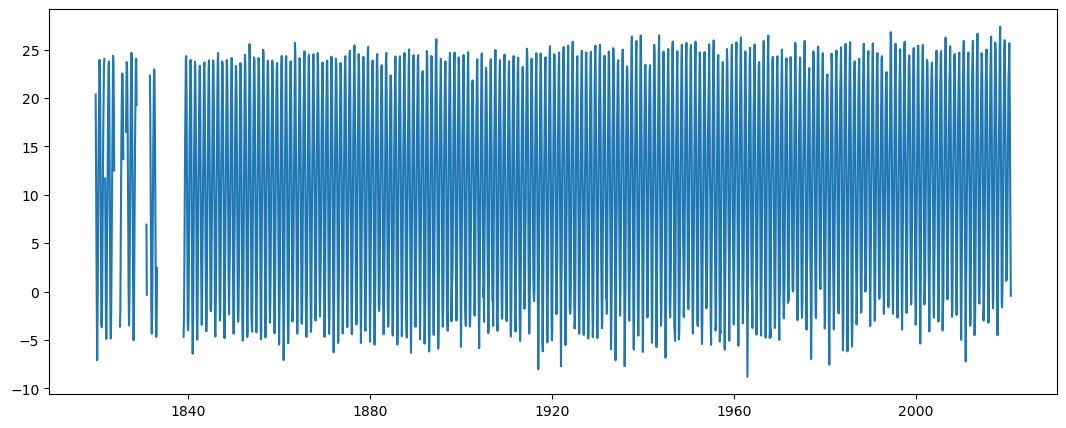

In [5]:
plt.rcParams['figure.figsize'] = [13, 5]
plt.plot(seoul_month['DateTime'],seoul_month["Monthly Anamoly"])

### 실제 12-Moving Average & 10year-Moving Average 시각화

In [6]:
month12_ma = seoul_month["Monthly Anamoly"].rolling(window=12).mean()
year10_ma = seoul_month["Monthly Anamoly"].rolling(window=120).mean()

In [7]:
month12_ma

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2413    12.878333
2414    12.800083
2415    12.635250
2416    12.679167
2417    12.550667
Name: Monthly Anamoly, Length: 2418, dtype: float64

In [8]:
year10_ma

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2413    12.083175
2414    12.078417
2415    12.077542
2416    12.091267
2417    12.097483
Name: Monthly Anamoly, Length: 2418, dtype: float64

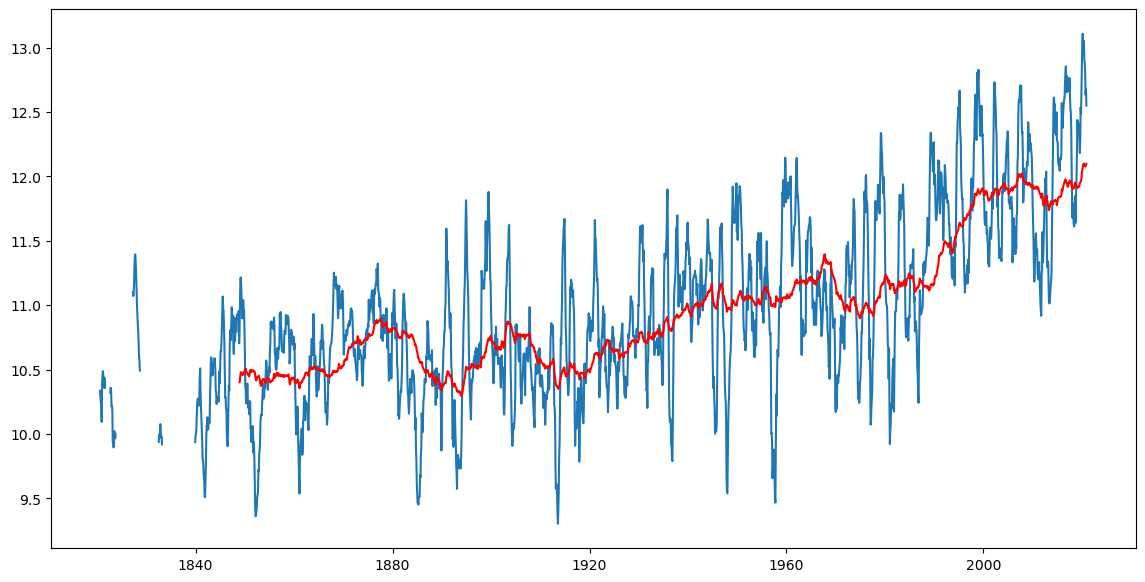

In [9]:
plt.rcParams['figure.figsize'] = [14, 7]
plt.plot(seoul_month['DateTime'],month12_ma)
plt.plot(seoul_month['DateTime'],year10_ma, color='red')

# SHANGHAI

In [10]:
shanghai_month = all_df.loc[all_df.loc[:,"city_num"] == 1]
shanghai_month["DateTime"] = shanghai_month["year"].astype('str') + '-' + shanghai_month["month"].astype('str')
shanghai_month["DateTime"] = pd.to_datetime(shanghai_month["DateTime"])
shanghai_month

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
2418,1819,7,27.191,1.919,1,1819-07-01
2419,1819,8,NaN,NaN,1,1819-08-01
2420,1819,9,23.599,1.779,1,1819-09-01
2421,1819,10,17.048,1.961,1,1819-10-01
2422,1819,11,10.205,2.007,1,1819-11-01
...,...,...,...,...,...,...
4831,2020,8,30.436,0.196,1,2020-08-01
4832,2020,9,24.199,0.211,1,2020-09-01
4833,2020,10,18.380,0.387,1,2020-10-01
4834,2020,11,14.438,0.533,1,2020-11-01


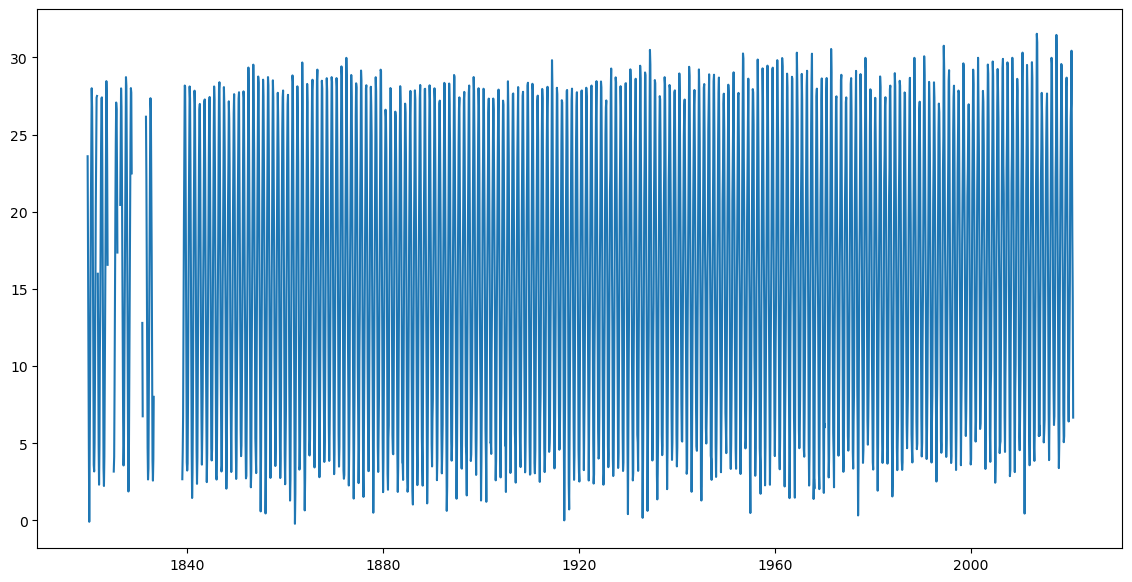

In [11]:
plt.plot(shanghai_month['DateTime'],shanghai_month["Monthly Anamoly"])
plt.rcParams['figure.figsize'] = [13, 5]

In [12]:
shanghai_month12_ma = shanghai_month["Monthly Anamoly"].rolling(window=12).mean()
shanghai_year10_ma = shanghai_month["Monthly Anamoly"].rolling(window=120).mean()

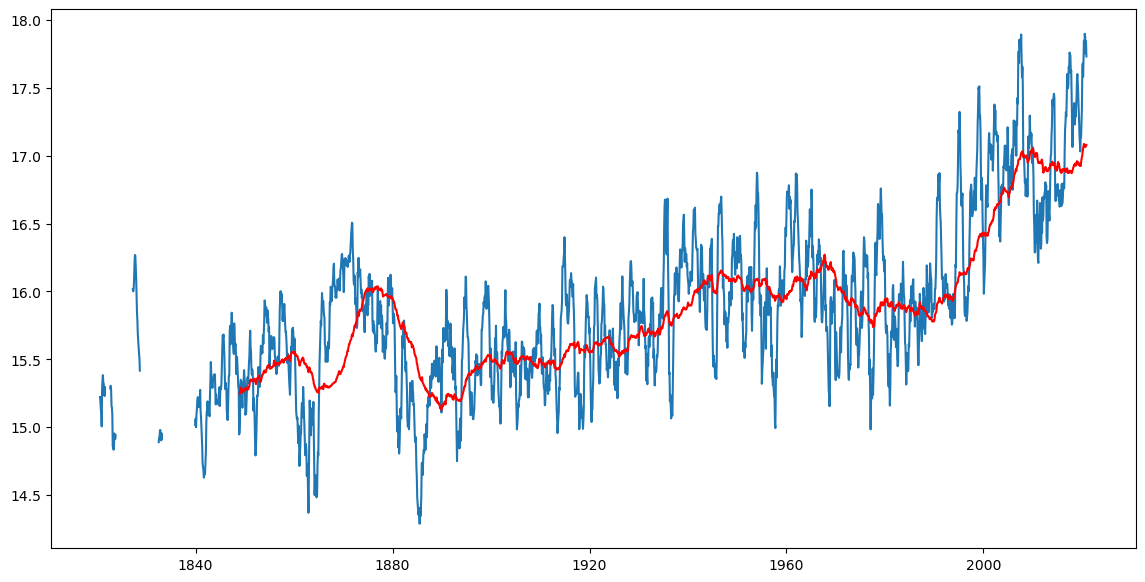

In [13]:
plt.rcParams['figure.figsize'] = [14, 7]
plt.plot(seoul_month['DateTime'],shanghai_month12_ma)
plt.plot(seoul_month['DateTime'],shanghai_year10_ma, color='red')

### TOKYO

In [14]:
tokyo_month = all_df.loc[all_df.loc[:,"city_num"] == 2]
tokyo_month["DateTime"] = tokyo_month["year"].astype('str') + '-' + tokyo_month["month"].astype('str')
tokyo_month["DateTime"] = pd.to_datetime(tokyo_month["DateTime"])
tokyo_month

,year,month,Monthly Anamoly,Monthly Unc.,city_num,DateTime
4836,1819,7,22.664,2.002,2,1819-07-01
4837,1819,8,NaN,NaN,2,1819-08-01
4838,1819,9,20.356,1.856,2,1819-09-01
4839,1819,10,13.372,1.919,2,1819-10-01
4840,1819,11,6.752,1.990,2,1819-11-01
...,...,...,...,...,...,...
7249,2020,8,27.166,0.388,2,2020-08-01
7250,2020,9,22.270,0.199,2,2020-09-01
7251,2020,10,14.491,0.139,2,2020-10-01
7252,2020,11,10.471,0.169,2,2020-11-01


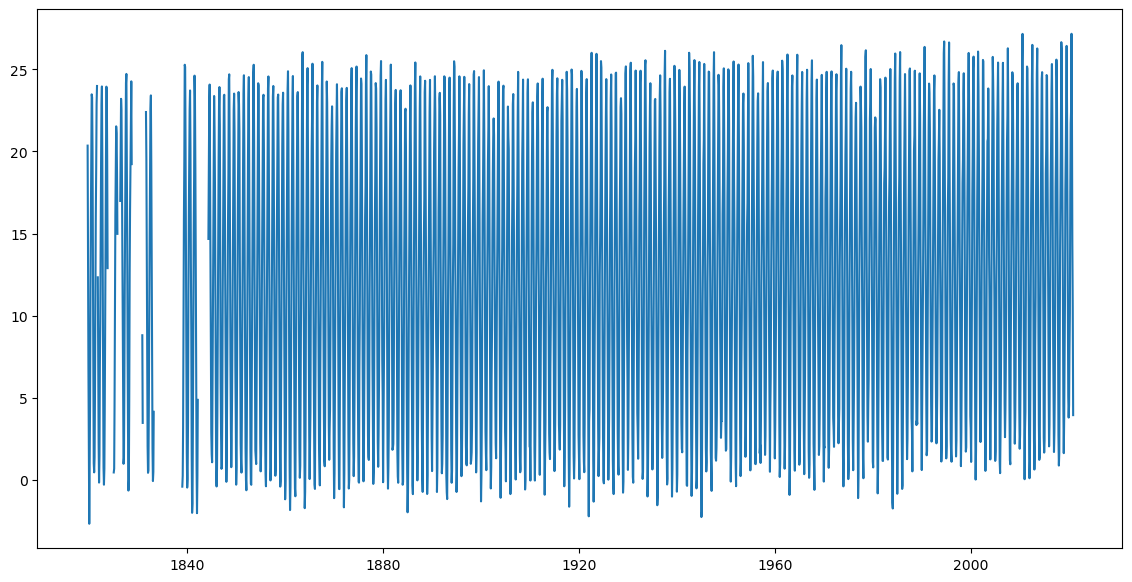

In [15]:
plt.plot(tokyo_month['DateTime'],tokyo_month["Monthly Anamoly"])
plt.rcParams['figure.figsize'] = [13, 5]

In [16]:
tokyo_month12_ma = tokyo_month["Monthly Anamoly"].rolling(window=12).mean()
tokyo_year10_ma = tokyo_month["Monthly Anamoly"].rolling(window=120).mean()

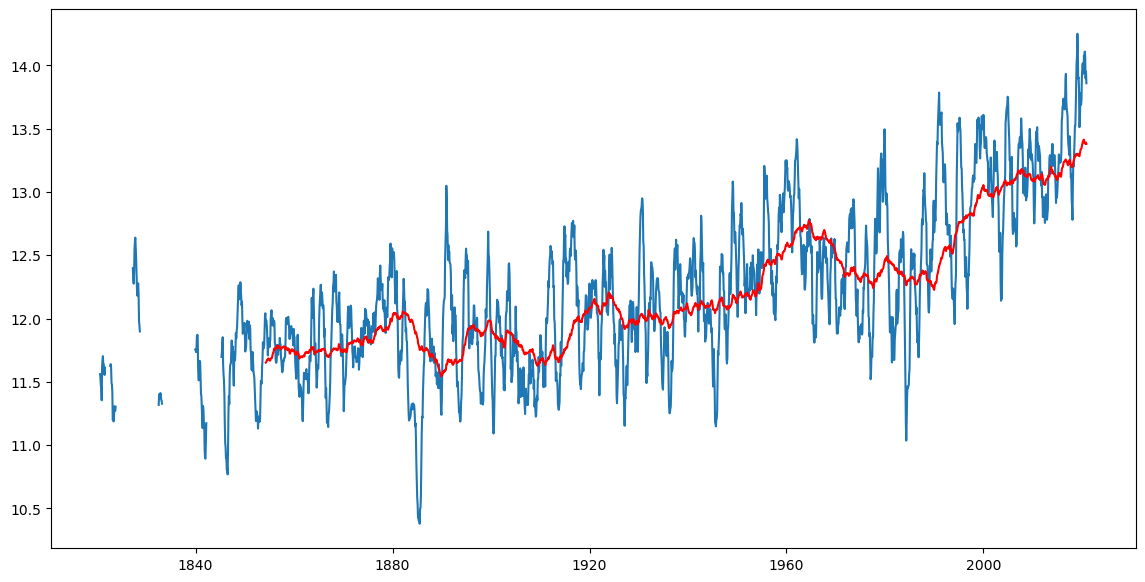

In [17]:
plt.rcParams['figure.figsize'] = [14, 7]
plt.plot(seoul_month['DateTime'],tokyo_month12_ma)
plt.plot(seoul_month['DateTime'],tokyo_year10_ma, color='red')